# preliminaries

## import packages

In [31]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

#file system
import os
import glob

#data handling
import numpy as np
import pandas as pd

#plotting
import seaborn as sns 
import matplotlib as mpl
import matplotlib.pyplot as plt

# custom code
from src import features, annotation, parameters, segmentation, spectrogramming


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## load path variables

In [7]:
## TODO: put these is a paths.py file and run it here using %run /path/to/file.py

#paths to raw data
all_wav_raw = '/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/development/'
all_wav_bw_po_cf = '/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_cf/'
all_wav_bw_po_f1 = '/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f1/'
all_wav_bw_po_f2 = '/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/'

#paths to clips for developmental dataset
all_voc_clips_dirs = '/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/clips/amplitude_segmented/final/vocalization_clips'
all_bg_clips_dirs = '/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/clips/amplitude_segmented/final/background_clips/'

#root directory for all of the segments (start and stop times)
segments_root = '/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/segments/'
clips_root = '/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/clips/'
specs_root = '/n/hoekstra_lab_tier1/Users/njourjine/manuscript/features/spectrograms/'
noise_root = '/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/noise/'

#csv of annotated segments (start and stop times) from the development dataset
test_set_path = '/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/annotated/annotations_csv/all_annotations.csv'

# segment the audio using amplitude thresholding

## set the segmenting parameters

In [3]:
#choose the parameters for all species except MZ
thresholds_path = '/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/noise/all_noise_floors.csv'
seg_params = {
    'min_freq': 20e3, # minimum frequency
    'max_freq': 125e3, # maximum frequency
    'nperseg': 1024, # FFT
    'noverlap': 1024//2, # FFT
    'spec_min_val': .8, # minimum log-spectrogram value
    'spec_max_val': 6, # maximum log-spectrogram value
    'fs': 250000, # audio samplerate
    'th_1':.3, # segmenting threshold 1
    'th_2':.3, # segmenting threshold 2
    'th_3':.35, # segmenting threshold 3
    'min_dur':0.015, # minimum syllable duration
    'max_dur': 1, # maximum syllable duration
    'min_intersyllable': .004,
    'smoothing_timescale': 0.00025, # amplitude
    'softmax': False, # apply softmax to the frequency bins to calculate
                      # amplitude
    'temperature':0.01, # softmax temperature parameter
    'thresholds_path': None,
    'algorithm': '<function get_onsets_offsets at 0x7f944cc355f0>', # (defined above)
}


#name them
dataset = 'development'
iteration = parameters.get_date_time()
params_save_name = ('_').join([dataset,iteration])
params_save_dir = os.path.join(segments_root,dataset,'amplitude_segmented',iteration,'00_params')+'/'


#make directories for them
if iteration not in os.listdir(os.path.join(segments_root,dataset, 'amplitude_segmented')):
    path_to_make = os.path.join(segments_root,dataset,'amplitude_segmented',iteration)
    os.mkdir(path_to_make)
    print('making this directory:\n\t', path_to_make)
    
if '00_params' not in os.listdir(os.path.join(segments_root,dataset,'amplitude_segmented',iteration)):
    path_to_make = os.path.join(segments_root,dataset,'amplitude_segmented',iteration,'00_params')
    os.mkdir(path_to_make)
    print('making this directory:\n\t', path_to_make)

#save them
assert os.path.exists(params_save_dir)
assert params_save_dir.endswith('/')
parameters.save_parameters(params = seg_params, 
                           save_dir = params_save_dir, 
                           save_name = params_save_name)



making this directory:
	 /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/segments/development/amplitude_segmented/20230119_040737
making this directory:
	 /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/segments/development/amplitude_segmented/20230119_040737/00_params
making a new params file...
saved the params file to:
 /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/segments/development/amplitude_segmented/20230119_040737/00_params/development_20230119_040737


In [184]:
#choose the parameters for  MZ
thresholds_path = '/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/noise/all_noise_floors.csv'
seg_params = {
    'min_freq': 20e3, # minimum frequency
    'max_freq': 125e3, # maximum frequency
    'nperseg': 1024, # FFT
    'noverlap': 1024//2, # FFT
    'spec_min_val': 2, # minimum log-spectrogram value
    'spec_max_val': 6, # maximum log-spectrogram value
    'fs': 250000, # audio samplerate
    'th_1':.3, # segmenting threshold 1
    'th_2':.3, # segmenting threshold 2
    'th_3':.35, # segmenting threshold 3
    'min_dur':0.015, # minimum syllable duration
    'max_dur': 1, # maximum syllable duration
    'min_intersyllable': .004,
    'smoothing_timescale': 0.00025, # amplitude
    'softmax': False, # apply softmax to the frequency bins to calculate
                      # amplitude
    'temperature':0.01, # softmax temperature parameter
    'thresholds_path': None,
    'algorithm': '<function get_onsets_offsets at 0x7f944cc355f0>', # (defined above)
}


#name them
params_save_name = ('_').join(['MZ',dataset,iteration])
params_save_dir = os.path.join(segments_root,dataset,'amplitude_segmented',iteration,'00_params')+'/'

#save them
assert os.path.exists(params_save_dir)
assert params_save_dir.endswith('/')
parameters.save_parameters(params = seg_params, 
                           save_dir = params_save_dir, 
                           save_name = params_save_name)



making a new params file...
saved the params file to:
 /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/segments/development/amplitude_segmented/20230118_083823/00_params/MZ_development_20230118_083823


## segment

In [187]:
#get raw audio to segment

# change these if you want to keep segmenting from a previous iterationn
species_list = ['NB', 'PO', 'MZ', 'BK', 'LL', 'MU', 'BW', 'GO', 'SW', 'LO', 'IS']
dataset = 'development'
iteration='20230118_083823' 
raw_dir = all_wav_raw


#TO DO just remove these from the raw data
#if the dataset is bw_po_f2, ensure that the corrupted unsegmented files aren't in raw_dir
unsegmentable = ['ch8_BWxPO-cross-F2_26878x27490_fam-D3_ltr6_pup4_ch8_4700_f_333_298_fr0_p9_2021-04-16_15-26-07.wav',
                 'ch8_BWxPO-cross-F2_26878x27490_fam-D3_ltr6_pup7_ch8_3800_f_338_285_fr0_p7_2021-04-14_17-27-18.wav',
                 'ch8_BWxPO-cross-F2_27404x27407_fam-A7_ltr1_pup7_ch8_4200_m_328_275_fr1_p7_2021-01-05_13-47-10.wav']

for i in unsegmentable:
    assert i not in os.listdir(raw_dir)

#specify the directory where segment csvs will be saved
save_dir = os.path.join(segments_root,dataset,'amplitude_segmented',iteration)

#load the params and make sure everything looks ok
print('\ndata set is:\n\t',dataset, '\n')

# load the parameters
params_save_dir = os.path.join(segments_root,dataset,'amplitude_segmented',iteration,'00_params')+'/'
params_save_name = ('_').join([dataset,iteration])
seg_params = parameters.load_parameters(save_dir = params_save_dir, 
                                        save_name = params_save_name)
MZ_seg_params = parameters.load_parameters(save_dir = params_save_dir, 
                                           save_name = ('_').join(['MZ',dataset,iteration]))
print('\nthey are:\n')
for key in seg_params.keys():
    print('\t',key,':',seg_params[key])
    
print('\nMZ specific params are:\n')
for key in seg_params.keys():
    print('\t',key,':',MZ_seg_params[key])

print('\nstart and stop times will be identified in raw wav files here:\n\t', raw_dir)
print('\nand saved here:\n\t', save_dir)
    
val = input('everything look ok for segmenting? y/n')
assert val in ['y','n']
if val == 'n':
    print('ok - doing nothing')
elif val == 'y':
    
    #iterate through each species you want and segment
    for species in species_list:
        
        #get the MZ specific parameters if you're segmenting MZ
        if species=='MZ':
            seg_params = parameters.load_parameters(save_dir = params_save_dir, 
                                                    save_name = ('_').join(['MZ',dataset,iteration]))
            
        segmentation.get_amplitude_segments(audio_dir = raw_dir, 
                                            save_dir = save_dir, 
                                            seg_params = seg_params, 
                                            species = species, 
                                            thresholds_path = seg_params['thresholds_path'],
                                            intersyll_threshold = seg_params['min_intersyllable'], 
                                            duration_threshold = seg_params['min_dur'])




data set is:
	 development 

loaded parameters from:
	 /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/segments/development/amplitude_segmented/20230118_083823/00_params/development_20230118_083823
loaded parameters from:
	 /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/segments/development/amplitude_segmented/20230118_083823/00_params/MZ_development_20230118_083823

they are:

	 min_freq : 20000.0
	 max_freq : 125000.0
	 nperseg : 1024
	 noverlap : 512
	 spec_min_val : 0.8
	 spec_max_val : 6
	 fs : 250000
	 th_1 : 0.3
	 th_2 : 0.3
	 th_3 : 0.35
	 min_dur : 0.015
	 max_dur : 1
	 min_intersyllable : 0.004
	 smoothing_timescale : 0.00025
	 softmax : False
	 temperature : 0.01
	 thresholds_path : None
	 algorithm : <function get_onsets_offsets at 0x7f944cc355f0>

MZ specific params are:

	 min_freq : 20000.0
	 max_freq : 125000.0
	 nperseg : 1024
	 noverlap : 512
	 spec_min_val : 2
	 spec_max_val : 6
	 fs : 250000
	 th_1 : 0.3
	 th_2 : 0.3
	 th_3 : 0.35
	 min_dur : 0.015
	

/n/hoekstra_lab_tier1/Users/njourjine/public_repositories/peromyscus-pup-vocal-evolution/src/segmentation.py:100: WavFileWarning: Chunk (non-data) not understood, skipping it.
  _, audio = wavfile.read(file)


SEGMENTING... MZ_na_na_na_na_na_na_na_na_box24_p1_pup2_2022-07-11_15-49-29.wav
spec_min_val is 2
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 161 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/development/MZ_na_na_na_na_na_na_na_na_box40_p3_pup1_2022-07-11_14-53-20.wav
PROCESSING... /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/development/MZ_na_na_na_na_na_na_na_na_box40_p3_pup1_2022-07-11_14-53-20.wav
SEGMENTING... MZ_na_na_na_na_na_na_na_na_box40_p3_pup1_2022-07-11_14-53-20.wav
spec_min_val is 2
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 158 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/development/MZ_na_na_na_na_na_na_na_na_box2_p13_pup1_2022-07-04_12-46-34.wav
PROCESSING... /n/hoekstra_lab_tier1/Users/njourjine/manuscript

getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 15 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/development/MZ_na_na_na_na_na_na_na_na_box30_p11_pup1_2022-07-15_13-38-21.wav
PROCESSING... /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/development/MZ_na_na_na_na_na_na_na_na_box30_p11_pup1_2022-07-15_13-38-21.wav
SEGMENTING... MZ_na_na_na_na_na_na_na_na_box30_p11_pup1_2022-07-15_13-38-21.wav
spec_min_val is 2
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 71 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/development/MZ_na_na_na_na_na_na_na_na_box30_p4_pup1_2022-07-04_13-06-44.wav
PROCESSING... /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/development/MZ_na_na_na_na_na_na_na_na_box30_p4_pup1_2022-07-04_13-06-44.wav
SEGMENTI

SEGMENTING... MZ_na_na_na_na_na_na_na_na_box2_p13_pup3_2022-07-04_12-59-27.wav
spec_min_val is 2
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 1 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/development/MZ_na_na_na_na_na_na_na_na_box8_p13_pup1_2022-07-13_09-23-16.wav
PROCESSING... /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/development/MZ_na_na_na_na_na_na_na_na_box8_p13_pup1_2022-07-13_09-23-16.wav
SEGMENTING... MZ_na_na_na_na_na_na_na_na_box8_p13_pup1_2022-07-13_09-23-16.wav
spec_min_val is 2
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 136 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/development/MZ_na_na_na_na_na_na_na_na_box26_p5_pup6_2022-07-01_10-34-51.wav
PROCESSING... /n/hoekstra_lab_tier1/Users/njourjine/manuscript/a

getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 122 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/development/MZ_na_na_na_na_na_na_na_na_box30_p11_pup5_2022-07-15_14-05-26.wav
PROCESSING... /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/development/MZ_na_na_na_na_na_na_na_na_box30_p11_pup5_2022-07-15_14-05-26.wav
SEGMENTING... MZ_na_na_na_na_na_na_na_na_box30_p11_pup5_2022-07-15_14-05-26.wav
spec_min_val is 2
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 39 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/development/MZ_na_na_na_na_na_na_na_na_box24_p1_pup1_2022-07-11_15-43-36.wav
PROCESSING... /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/development/MZ_na_na_na_na_na_na_na_na_box24_p1_pup1_2022-07-11_15-43-36.wav
SEGMENT

SEGMENTING... MZ_na_na_na_na_na_na_na_na_box30_p11_pup2_2022-07-15_13-45-24.wav
spec_min_val is 2
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 97 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/development/MZ_na_na_na_na_na_na_na_na_box5s_p1_pup5_2022-07-11_12-29-56.wav
PROCESSING... /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/development/MZ_na_na_na_na_na_na_na_na_box5s_p1_pup5_2022-07-11_12-29-56.wav
SEGMENTING... MZ_na_na_na_na_na_na_na_na_box5s_p1_pup5_2022-07-11_12-29-56.wav
spec_min_val is 2
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 90 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/development/MZ_na_na_na_na_na_na_na_na_box10_p3_pup4_2022-07-11_11-46-34.wav
PROCESSING... /n/hoekstra_lab_tier1/Users/njourjine/manuscript/

getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 24 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/development/MZ_na_na_na_na_na_na_na_na_box30_p4_pup2_2022-07-04_13-12-56.wav
PROCESSING... /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/development/MZ_na_na_na_na_na_na_na_na_box30_p4_pup2_2022-07-04_13-12-56.wav
SEGMENTING... MZ_na_na_na_na_na_na_na_na_box30_p4_pup2_2022-07-04_13-12-56.wav
spec_min_val is 2
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 32 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/development/MZ_na_na_na_na_na_na_na_na_box12_p1_pup1_2022-07-21_11-39-58.wav
PROCESSING... /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/development/MZ_na_na_na_na_na_na_na_na_box12_p1_pup1_2022-07-21_11-39-58.wav
SEGMENTING.

SEGMENTING... MZ_na_na_na_na_na_na_na_na_box30f_p9_pup2_2022-07-13_11-08-11.wav
spec_min_val is 2
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 239 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/development/MZ_na_na_na_na_na_na_na_na_box30_p4_pup4_2022-07-04_13-25-23.wav
PROCESSING... /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/development/MZ_na_na_na_na_na_na_na_na_box30_p4_pup4_2022-07-04_13-25-23.wav
SEGMENTING... MZ_na_na_na_na_na_na_na_na_box30_p4_pup4_2022-07-04_13-25-23.wav
spec_min_val is 2
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 53 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/development/MZ_na_na_na_na_na_na_na_na_box26_p5_pup1_2022-07-01_10-02-50.wav
PROCESSING... /n/hoekstra_lab_tier1/Users/njourjine/manuscript

getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 239 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/development/MZ_na_na_na_na_na_na_na_na_box26_p5_pup5_2022-07-01_10-28-37.wav
PROCESSING... /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/development/MZ_na_na_na_na_na_na_na_na_box26_p5_pup5_2022-07-01_10-28-37.wav
SEGMENTING... MZ_na_na_na_na_na_na_na_na_box26_p5_pup5_2022-07-01_10-28-37.wav
spec_min_val is 2
getting maxima
...merging vocalizations separated by less than 0.004 seconds..
...dropping vocalizations shorter than 0.015 seconds..
...FOUND 132 vocalizations
/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/development/MZ_na_na_na_na_na_na_na_na_box16_p5_pup3_2022-07-11_11-13-13.wav
PROCESSING... /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/development/MZ_na_na_na_na_na_na_na_na_box16_p5_pup3_2022-07-11_11-13-13.wav
SEGMENTIN

## aggregate the segments files 

In [188]:
#choose the dataset and segmenting iteration if you want (otherwise will existing values for dataset and iteration 
#- these are the only things you have to change in this cell to process a new dataset 
# dataset = 'bw_po_f2'
# iteration = '20220921_040238'

#path to the dir containing one csv with segment start and stop times per raw audio file
segments_path = os.path.join(segments_root,dataset,'amplitude_segmented',iteration)

#make sure you segmented every wav file
raw_wavs = os.listdir(all_wav_raw)
segmented_wavs = [i.split('.')[0]+'.wav' for i in os.listdir(segments_path) if 'all' not in i and i.endswith('.csv')]
assert sorted(raw_wavs) == sorted(segmented_wavs), "You haven't segmented all of the raw wav files..."

#make a list of the segments files for each pup
pup_segments = [os.path.join(segments_path, i) for i in os.listdir(segments_path) if i.endswith('.csv') and 'all' not in i and not i.startswith('.')]

#combine them
to_combine = []
for temp in pup_segments:
    temp_df = pd.read_csv(temp)
    to_combine.append(temp_df)
    
all_combined = pd.concat(to_combine)

#add species column info and fix up the source_file columns
all_combined['species'] = [i.split('/')[-1].split('_')[0] for i in all_combined['source_file']]
all_combined['source_file'] = [os.path.split(i)[-1] for i in all_combined['source_file']]

#check for na and duplications, make sure source file is formatted correctly, then save
assert all_combined.isna().sum().sum() == 0
assert all_combined.duplicated().sum() == 0
assert set([i.split('_')[0] for i in all_combined['source_file']]) == set(all_combined['species'])
all_combined.to_csv(os.path.join(segments_path, 'all_combined.csv'), index=False)
print('saved a combined file to:\n\t', os.path.join(segments_path, 'all_combined.csv'))

#preview to make sure column names look ok
all_combined.head()


saved a combined file to:
	 /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/segments/development/amplitude_segmented/20230118_083823/all_combined.csv


,start_seconds,stop_seconds,source_file,duration,species
0,0.126976,0.159744,NB_26481x26788_ltr1_pup4_ch5_4700_m_336_283_fr...,0.032768,NB
1,0.714752,0.755712,NB_26481x26788_ltr1_pup4_ch5_4700_m_336_283_fr...,0.040960,NB
2,0.940032,0.972800,NB_26481x26788_ltr1_pup4_ch5_4700_m_336_283_fr...,0.032768,NB
3,1.130496,1.423360,NB_26481x26788_ltr1_pup4_ch5_4700_m_336_283_fr...,0.292864,NB
4,1.533952,1.835008,NB_26481x26788_ltr1_pup4_ch5_4700_m_336_283_fr...,0.301056,NB


# generate wav clips from amplitude segmented segments

## write wav files for vocalizations

In [47]:
#load the combined segments csv
source_data_path = os.path.join(segments_path, 'all_combined.csv')
source_data = pd.read_csv(source_data_path)

#make it's what you expect and that you cleaned up na and duplications
assert source_data.isna().sum().sum() == 0
assert source_data.duplicated().sum() == 0
assert set(source_data.columns) == set(['start_seconds', 'stop_seconds', 'source_file', 'duration', 'species'])

if dataset == 'bw_po_cf':
    assert set(source_data['species'].unique()) == set(['BW', 'PO', 'CF-BW', 'CF-PO'])
elif dataset == 'bw_po_f1':
    assert set(source_data['species'].unique()) == set(['cross-BW', 'cross-PO', 'BW-PO-cross-F1'])
elif dataset == 'bw_po_f2':
    assert set(source_data['species'].unique()) == set(['ch1', 'ch2', 'ch3', 'ch4', 'ch5', 'ch6', 'ch7', 'ch8'])
    #drop the unsegmentable bw_po_f2
    unsegmentable = ['ch8_BWxPO-cross-F2_26878x27490_fam-D3_ltr6_pup4_ch8_4700_f_333_298_fr0_p9_2021-04-16_15-26-07.wav',
                 'ch8_BWxPO-cross-F2_26878x27490_fam-D3_ltr6_pup7_ch8_3800_f_338_285_fr0_p7_2021-04-14_17-27-18.wav',
                 'ch8_BWxPO-cross-F2_27404x27407_fam-A7_ltr1_pup7_ch8_4200_m_328_275_fr1_p7_2021-01-05_13-47-10.wav']
    source_data = source_data.loc[~source_data['source_file'].isin(unsegmentable)]

#get the path to the raw unsegmented wavs
if dataset == 'bw_po_cf':
    wavs_dir = all_wav_bw_po_cf
elif dataset == 'bw_po_f1':
    wavs_dir = all_wav_bw_po_f1
elif dataset == 'bw_po_f2':
    wavs_dir = all_wav_bw_po_f2
elif dataset == 'development':
    wavs_dir = all_wav_raw
            
bar = '######################################################################################################'
#set the directory for saving and make it TODO - get the data from datetime
save_root = os.path.join(clips_root,'amplitude_segmentation',dataset)
assert os.path.exists(save_root)

print(bar)
print('segmenting wavs from this directory:\n\n',wavs_dir,'\n')
print(bar)
print('using start and stop times from this file:\n\n',source_data_path,'\n')
print(bar)
print('saving them to individual species directories here:\n\n',save_root,'\n')
print(bar)
print('those species are:\n\n',sorted(source_data['species'].unique()),'\n')
print(bar)
print(len(source_data), 'vocalization clips will be written to wav files')

val = input("continue? y/n")
assert val in ['y', 'n']
if val == 'n':
    print('ok - doing nothing.')
elif val == 'y':
#iterate through the species   
    species_list = list(all_combined['species'].unique())                    
    for species in species_list:
        print(species)
        
        save_location = os.path.join(save_root,species)
        start_column = 'start_seconds'
        end_column = 'stop_seconds'

        if species not in os.listdir(save_root):
            print('making a directory to store', species, 'vocalization clips...')
            os.mkdir(save_location)

        get_wav_clips(wavs_dir = wavs_dir, 
                      save_location = save_location, 
                      source_data = source_data, 
                      start_column = start_column, 
                      end_column = end_column,
                      label_column = None,
                      species = species,
                      margin = 0, 
                      units = 's')

######################################################################################################
segmenting wavs from this directory:

 /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/raw/bw_po_f2/ 

######################################################################################################
using start and stop times from this file:

 /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/segments/bw_po_f2/amplitude_segmentation/20220921_040238/all_combined.csv 

######################################################################################################
saving them to individual species directories here:

 /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/clips/amplitude_segmentation/bw_po_f2 

######################################################################################################
those species are:

 ['ch1', 'ch2', 'ch3', 'ch4', 'ch5', 'ch6', 'ch7', 'ch8'] 

#########################################################################

all segments from ch3_BWxPO-cross-F2_28207x28209_fam-D5_ltr1_pup3_ch3_2900_f_363_300_fr0_p7_2020-12-09_13-02-37.wav already processed, skipping...
all segments from ch3_BWxPO-cross-F2_27004x27488_fam-D1_ltr3_pup6_ch3_4400_f_344_326_fr0_p9_2021-02-03_13-28-11.wav already processed, skipping...
all segments from ch3_BWxPO-cross-F2_28978x28979_fam-A10_ltr6_pup1_ch3_6000_m_336_307_fr1_p9_2021-07-01_13-02-04.wav already processed, skipping...
all segments from ch3_BWxPO-cross-F2_26878x27940_fam-D3_ltr3_pup2_ch3_3700_m_353_303_fr0_p7_2021-01-30_15-22-50.wav already processed, skipping...
all segments from ch3_BWxPO-cross-F2_27732x27733_fam-B5_ltr3_pup2_ch3_3700_m_353_299_fr0_p7_2021-03-07_16-26-47.wav already processed, skipping...
all segments from ch3_BWxPO-cross-F2_26879x27489_fam-D2_ltr7_pup3_ch3_3900_f_331_295_fr0_p9_2021-05-29_14-34-37.wav already processed, skipping...
all segments from ch3_BWxPO-cross-F2_28207x28209_fam-D5_ltr3_pup3_ch3_4200_m_350_300_fr0_p9_2021-02-25_13-59-19.wav a

all segments from ch3_BWxPO-cross-F2_27404x27407_fam-A7_ltr5_pup3_ch3_4200_f_338_320_fr0_p9_2021-04-16_14-10-32.wav already processed, skipping...
all segments from ch3_BWxPO-cross-F2_28693x28694_fam-D8_ltr6_pup2_ch3_4300_f_336_307_fr0_p9_2021-06-09_14-58-09.wav already processed, skipping...
all segments from ch3_BWxPO-cross-F2_28693x28694_fam-D8_ltr6_pup2_ch3_3800_f_339_281_fr0_p7_2021-06-07_15-20-44.wav already processed, skipping...
all segments from ch3_BWxPO-cross-F2_29801x29802_fam-D9_ltr1_pup2_ch3_4200_m_346_295_fr0_p7_2021-05-24_15-44-41.wav already processed, skipping...
all segments from ch3_BWxPO-cross-F2_28457x28458_fam-D6_ltr7_pup2_ch3_5000_m_345_308_fr0_p9_2021-06-18_15-15-44.wav already processed, skipping...
all segments from ch3_BWxPO-cross-F2_27405x27406_fam-A6_ltr8_pup1_ch3_4300_m_333_271_fr0_p9_2021-06-24_12-37-40.wav already processed, skipping...
all segments from ch3_BWxPO-cross-F2_26366x26370_fam-A5_ltr7_pup1_ch3_3300_f_349_308_fr0_p9_2021-06-19_12-42-09.wav al

all segments from ch3_BWxPO-cross-F2_28134x28136_fam-A8_ltr4_pup4_ch3_4700_f_340_313_fr0_p9_2021-03-17_17-12-05.wav already processed, skipping...
all segments from ch3_BWxPO-cross-F2_27405x27406_fam-A6_ltr6_pup2_ch3_3100_m_339_277_fr0_p7_2021-04-27_13-27-57.wav already processed, skipping...
all segments from ch3_BWxPO-cross-F2_25704x25707_fam-A1_ltr8_pup2_ch3_3700_m_343_283_fr1_p7_2021-05-28_15-52-38.wav already processed, skipping...
all segments from ch3_BWxPO-cross-F2_27004x27488_fam-D1_ltr3_pup2_ch3_4000_m_355_310_fr0_p7_2021-02-01_14-14-48.wav already processed, skipping...
all segments from ch3_BWxPO-cross-F2_26878x27490_fam-D3_ltr5_pup2_ch3_3000_f_346_299_fr0_p7_2021-03-20_13-11-27.wav already processed, skipping...
all segments from ch3_BWxPO-cross-F2_26878x27490_fam-D3_ltr4_pup3_ch3_3800_m_346_319_fr0_p9_2021-02-26_16-29-55.wav already processed, skipping...
all segments from ch3_BWxPO-cross-F2_27004x27488_fam-D1_ltr2_pup2_ch3_5000_m_335_312_fr0_p9_2021-01-07_19-22-11.wav al

all segments from ch3_BWxPO-cross-F2_26879x27489_fam-D2_ltr5_pup5_ch3_5000_m_344_308_fr1_p9_2021-03-16_19-10-55.wav already processed, skipping...
all segments from ch3_BWxPO-cross-F2_25704x25707_fam-A1_ltr4_pup1_ch3_3800_f_351_321_fr0_p9_2021-02-09_13-07-31.wav already processed, skipping...
all segments from ch3_BWxPO-cross-F2_27732x27733_fam-B5_ltr4_pup1_ch3_3200_f_338_299_fr0_p9_2021-04-05_19-17-05.wav already processed, skipping...
all segments from ch3_BWxPO-cross-F2_27404x27407_fam-A7_ltr3_pup2_ch3_3600_f_358_297_fr0_p7_2021-02-24_13-28-48.wav already processed, skipping...
all segments from ch3_BWxPO-cross-F2_26878x27490_fam-D3_ltr5_pup4_ch3_4200_f_351_324_fr0_p9_2021-03-22_17-35-18.wav already processed, skipping...
all segments from ch3_BWxPO-cross-F2_28978x28979_fam-A10_ltr3_pup2_ch3_3700_f_345_309_fr1_p7_2021-03-16_15-01-31.wav already processed, skipping...
all segments from ch3_BWxPO-cross-F2_27404x27407_fam-A7_ltr2_pup3_ch3_4800_f_331_325_fr1_p9_2021-02-02_13-00-18.wav a

all segments from ch3_BWxPO-cross-F2_27212x27213_fam-B4_ltr1_pup2_ch3_3000_f_330_286_fr0_p7_2021-01-14_12-56-13.wav already processed, skipping...
all segments from ch3_BWxPO-cross-F2_28207x28209_fam-D5_ltr6_pup2_ch3_3900_f_352_302_fr1_p7_2021-05-10_16-35-22.wav already processed, skipping...
all segments from ch3_BWxPO-cross-F2_28693x28694_fam-D8_ltr2_pup2_ch3_4200_f_363_302_fr1_p7_2021-02-14_15-37-28.wav already processed, skipping...
all segments from ch3_BWxPO-cross-F2_28207x28209_fam-D5_ltr4_pup2_ch3_3600_f_358_306_fr0_p7_2021-03-19_14-06-11.wav already processed, skipping...
all segments from ch3_BWxPO-cross-F2_28134x28136_fam-A8_ltr7_pup4_ch3_4900_m_349_300_fr0_p9_2021-06-21_19-28-11.wav already processed, skipping...
done.
ch6
all segments from ch6_BWxPO-cross-F2_26159x26161_fam-A3_ltr7_pup5_ch6_4600_f_336_298_fr0_p9_2021-04-10_13-56-04.wav already processed, skipping...
all segments from ch6_BWxPO-cross-F2_26879x27489_fam-D2_ltr7_pup4_ch6_4000_m_331_294_fr0_p9_2021-05-29_14-34

all segments from ch6_BWxPO-cross-F2_26158x26160_fam-A4_ltr7_pup5_ch6_4200_f_341_304_fr0_p9_2021-05-28_12-46-59.wav already processed, skipping...
all segments from ch6_BWxPO-cross-F2_28134x28136_fam-A8_ltr2_pup5_ch6_4900_f_343_312_fr0_p7_2021-01-26_17-43-59.wav already processed, skipping...
all segments from ch6_BWxPO-cross-F2_28978x28979_fam-A10_ltr2_pup5_ch6_3500_f_352_302_fr0_p7_2021-02-17_13-47-20.wav already processed, skipping...
all segments from ch6_BWxPO-cross-F2_26158x26160_fam-A4_ltr6_pup5_ch6_3700_m_331_312_fr0_p7_2021-05-02_14-26-37.wav already processed, skipping...
all segments from ch6_BWxPO-cross-F2_27005x27489_fam-D2_ltr2_pup5_ch6_4600_m_328_302_fr1_p9_2020-11-18_14-31-06.wav already processed, skipping...
all segments from ch6_BWxPO-cross-F2_26158x26160_fam-A4_ltr7_pup5_ch6_3400_f_327_294_fr1_p7_2021-05-26_14-45-58.wav already processed, skipping...
all segments from ch6_BWxPO-cross-F2_28339x28341_fam-A9_ltr4_pup4_ch6_4800_m_342_298_fr1_p9_2021-03-13_15-07-36.wav a

all segments from ch6_BWxPO-cross-F2_28456x28459_fam-D7_ltr5_pup5_ch6_4300_m_331_280_fr0_p7_2021-05-01_13-53-48.wav already processed, skipping...
all segments from ch6_BWxPO-cross-F2_28339x28341_fam-A9_ltr5_pup5_ch6_3600_f_345_291_fr0_p7_2021-04-05_17-39-14.wav already processed, skipping...
all segments from ch6_BWxPO-cross-F2_26878x27490_fam-D3_ltr7_pup5_ch6_4900_m_339_306_fr0_p9_2021-05-11_13-03-26.wav already processed, skipping...
all segments from ch6_BWxPO-cross-F2_26159x26161_fam-A3_ltr7_pup5_ch6_3800_f_343_271_fr1_p7_2021-04-08_15-42-49.wav already processed, skipping...
done.
ch5
all segments from ch5_BWxPO-cross-F2_26158x26160_fam-A4_ltr5_pup4_ch5_3800_m_348_283_fr0_p7_2021-04-07_14-04-28.wav already processed, skipping...
all segments from ch5_BWxPO-cross-F2_26366x26370_fam-A5_ltr5_pup2_ch5_5200_m_336_290_fr0_p9_2021-04-30_13-31-10.wav already processed, skipping...
all segments from ch5_BWxPO-cross-F2_28456x28459_fam-D7_ltr7_pup5_ch5_4600_f_338_296_fr0_p9_2021-06-25_15-36

all segments from ch5_BWxPO-cross-F2_28207x28209_fam-D5_ltr4_pup2_ch5_4300_f_347_309_fr0_p9_2021-03-21_13-00-32.wav already processed, skipping...
all segments from ch5_BWxPO-cross-F2_26158x26160_fam-A4_ltr6_pup1_ch5_3900_f_337_300_fr1_p9_2021-05-04_13-48-27.wav already processed, skipping...
all segments from ch5_BWxPO-cross-F2_28339x28341_fam-A9_ltr5_pup3_ch5_4700_f_335_314_fr0_p9_2021-04-07_12-36-49.wav already processed, skipping...
all segments from ch5_BWxPO-cross-F2_28134x28136_fam-A8_ltr2_pup1_ch5_5200_f_331_289_fr0_p9_2021-01-28_14-51-13.wav already processed, skipping...
all segments from ch5_BWxPO-cross-F2_28339x28341_fam-A9_ltr3_pup4_ch5_4500_m_350_293_fr0_p7_2021-02-15_17-34-59.wav already processed, skipping...
all segments from ch5_BWxPO-cross-F2_28134x28136_fam-A8_ltr3_pup4_ch5_3800_m_327_299_fr0_p7_2021-02-17_13-17-35.wav already processed, skipping...
all segments from ch5_BWxPO-cross-F2_28456x28459_fam-D7_ltr2_pup5_ch5_4400_f_324_300_fr0_p9_2021-02-12_15-33-06.wav al

all segments from ch5_BWxPO-cross-F2_26366x26370_fam-A5_ltr3_pup2_ch5_3700_f_346_303_fr0_p9_2021-03-13_13-21-15.wav already processed, skipping...
all segments from ch5_BWxPO-cross-F2_28134x28136_fam-A8_ltr7_pup3_ch5_4500_f_338_295_fr0_p9_2021-06-21_19-28-11.wav already processed, skipping...
all segments from ch5_BWxPO-cross-F2_25704x25707_fam-A1_ltr3_pup3_ch5_3000_m_346_283_fr0_p7_2020-09-16_12-47-17.wav already processed, skipping...
all segments from ch5_BWxPO-cross-F2_26879x27489_fam-D2_ltr3_pup6_ch5_4700_m_346_332_fr0_p9_2021-01-26_15-13-55.wav already processed, skipping...
all segments from ch5_BWxPO-cross-F2_27488x27004_fam-D1_ltr1_pup2_ch5_3800_f_337_313_fr0_p9_2020-10-23_14-42-17.wav already processed, skipping...
all segments from ch5_BWxPO-cross-F2_26366x26370_fam-A5_ltr5_pup4_ch5_2000_m_346_271_fr1_p7_2021-04-28_13-55-10.wav already processed, skipping...
all segments from ch5_BWxPO-cross-F2_27405x27406_fam-A6_ltr8_pup4_ch5_2900_f_336_274_fr0_p9_2021-06-24_12-37-40.wav al

all segments from ch5_BWxPO-cross-F2_26879x27489_fam-D2_ltr7_pup4_ch5_3200_m_348_275_fr0_p7_2021-05-27_15-45-23.wav already processed, skipping...
all segments from ch5_BWxPO-cross-F2_27405x27406_fam-A6_ltr7_pup4_ch5_3800_f_338_298_fr0_p9_2021-05-27_14-02-27.wav already processed, skipping...
all segments from ch5_BWxPO-cross-F2_27404x27407_fam-A7_ltr3_pup4_ch5_3600_f_348_296_fr1_p7_2021-02-24_13-28-48.wav already processed, skipping...
all segments from ch5_BWxPO-cross-F2_27004x27488_fam-D1_ltr8_pup4_ch5_3400_f_348_288_fr0_p7_2021-06-30_15-29-54.wav already processed, skipping...
all segments from ch5_BWxPO-cross-F2_26878x27490_fam-D3_ltr8_pup4_ch5_4700_m_346_279_fr0_p7_2021-06-27_13-07-33.wav already processed, skipping...
all segments from ch5_BWxPO-cross-F2_27004x27488_fam-D1_ltr4_pup4_ch5_3700_f_358_300_fr0_p7_2021-02-25_15-15-51.wav already processed, skipping...
all segments from ch5_BWxPO-cross-F2_26878x27490_fam-D3_ltr4_pup1_ch5_4500_m_346_323_fr1_p9_2021-02-26_16-29-55.wav al

all segments from ch4_BWxPO-cross-F2_25704x25707_fam-A1_ltr8_pup1_ch4_4700_m_341_310_fr1_p9_2021-05-30_12-41-11.wav already processed, skipping...
all segments from ch4_BWxPO-cross-F2_27004x27488_fam-D1_ltr5_pup3_ch4_4800_m_346_286_fr0_p7_2021-03-24_14-19-11.wav already processed, skipping...
all segments from ch4_BWxPO-cross-F2_26159x26161_fam-A3_ltr5_pup3_ch4_3500_f_352_306_fr0_p7_2021-02-18_15-57-37.wav already processed, skipping...
all segments from ch4_BWxPO-cross-F2_28339x28341_fam-A9_ltr3_pup1_ch4_3500_m_346_310_fr0_p9_2021-02-17_20-09-28.wav already processed, skipping...
all segments from ch4_BWxPO-cross-F2_28206x28208_fam-D4_ltr4_pup3_ch4_3600_f_342_306_fr0_p9_2021-04-25_13-02-04.wav already processed, skipping...
all segments from ch4_BWxPO-cross-F2_27212x27213_fam-B4_ltr3_pup3_ch4_3200_f_341_286_fr0_p7_2021-03-11_16-19-10.wav already processed, skipping...
all segments from ch4_BWxPO-cross-F2_28206x28208_fam-D4_ltr1_pup2_ch4_3900_f_336_291_fr0_p7_2020-11-10_13-46-07.wav al

all segments from ch4_BWxPO-cross-F2_28134x28136_fam-A8_ltr4_pup3_ch4_5200_m_348_293_fr0_p7_2021-03-15_17-31-53.wav already processed, skipping...
all segments from ch4_BWxPO-cross-F2_26878x27490_fam-D3_ltr8_pup1_ch4_4800_m_328_307_fr0_p9_2021-06-29_13-17-31.wav already processed, skipping...
all segments from ch4_BWxPO-cross-F2_29462x29463_fam-D12_ltr2_pup3_ch4_3900_m_349_292_fr0_p7_2021-05-24_16-14-48.wav already processed, skipping...
all segments from ch4_BWxPO-cross-F2_26366x26370_fam-A5_ltr7_pup3_ch4_3400_f_346_278_fr0_p7_2021-06-17_13-37-01.wav already processed, skipping...
all segments from ch4_BWxPO-cross-F2_28456x28459_fam-D7_ltr5_pup3_ch4_3000_m_343_292_fr0_p7_2021-05-01_13-53-48.wav already processed, skipping...
all segments from ch4_BWxPO-cross-F2_27405x27406_fam-A6_ltr5_pup3_ch4_2700_m_343_289_fr0_p7_2021-03-30_13-41-45.wav already processed, skipping...
all segments from ch4_BWxPO-cross-F2_26366x26370_fam-A5_ltr4_pup3_ch4_2600_f_353_291_fr0_p7_2021-04-04_14-40-31.wav a

all segments from ch4_BWxPO-cross-F2_26158x26160_fam-A4_ltr7_pup1_ch4_3300_m_335_296_fr0_p9_2021-05-28_12-46-59.wav already processed, skipping...
all segments from ch4_BWxPO-cross-F2_26878x27490_fam-D3_ltr3_pup4_ch4_4100_f_339_319_fr0_p9_2021-02-01_17-47-10.wav already processed, skipping...
all segments from ch4_BWxPO-cross-F2_27004x27488_fam-D1_ltr8_pup3_ch4_3300_f_346_292_fr0_p7_2021-06-30_15-29-54.wav already processed, skipping...
all segments from ch4_BWxPO-cross-F2_27404x27407_fam-A7_ltr3_pup3_ch4_3500_m_354_295_fr0_p7_2021-02-24_13-28-48.wav already processed, skipping...
all segments from ch4_BWxPO-cross-F2_26366x26370_fam-A5_ltr8_pup2_ch4_4300_m_328_278_fr0_p9_2021-07-13_13-26-14.wav already processed, skipping...
all segments from ch4_BWxPO-cross-F2_27404x27407_fam-A7_ltr1_pup3_ch4_2500_f_336_276_fr0_p7_2021-01-05_13-47-10.wav already processed, skipping...
all segments from ch4_BWxPO-cross-F2_26879x27489_fam-D2_ltr3_pup3_ch4_3400_m_353_317_fr0_p7_2021-01-24_17-34-10.wav al

all segments from ch4_BWxPO-cross-F2_27212x27213_fam-B4_ltr3_pup2_ch4_4100_m_337_291_fr0_p9_2021-03-13_17-05-00.wav already processed, skipping...
all segments from ch4_BWxPO-cross-F2_26159x26161_fam-A3_ltr2_pup4_ch4_5300_f_337_303_fr0_p9_2020-10-22_13-34-36.wav already processed, skipping...
all segments from ch4_BWxPO-cross-F2_28339x28341_fam-A9_ltr8_pup3_ch4_3100_m_343_275_fr0_p7_2021-06-16_16-06-08.wav already processed, skipping...
all segments from ch4_BWxPO-cross-F2_28134x28136_fam-A8_ltr6_pup3_ch4_5800_m_339_297_fr0_p9_2021-05-29_13-30-08.wav already processed, skipping...
all segments from ch4_BWxPO-cross-F2_27004x27488_fam-D1_ltr2_pup3_ch4_3800_f_333_308_fr0_p9_2021-01-07_19-22-11.wav already processed, skipping...
all segments from ch4_BWxPO-cross-F2_27212x27213_fam-B4_ltr2_pup1_ch4_5000_m_344_316_fr0_p9_2021-02-14_14-23-15.wav already processed, skipping...
all segments from ch4_BWxPO-cross-F2_27489x27005_fam-D2_ltr2_pup4_ch4_4100_m_353_302_fr1_p7_2020-11-16_14-51-53.wav al

all segments from ch2_BWxPO-cross-F2_28134x28136_fam-A8_ltr5_pup1_ch2_2900_m_353_289_fr0_p7_2021-04-10_17-53-20.wav already processed, skipping...
all segments from ch2_BWxPO-cross-F2_27004x27488_fam-D1_ltr6_pup1_ch2_4200_m_342_312_fr0_p7_2021-04-18_13-19-52.wav already processed, skipping...
all segments from ch2_BWxPO-cross-F2_28339x28341_fam-A9_ltr4_pup3_ch2_3900_f_349_306_fr0_p9_2021-03-13_15-07-36.wav already processed, skipping...
all segments from ch2_BWxPO-cross-F2_25704x25707_fam-A1_ltr1_pup1_ch2_4400_m_348_299_fr0_p9_2020-01-19_13-22-00.wav already processed, skipping...
all segments from ch2_BWxPO-cross-F2_27732x27733_fam-B5_ltr4_pup2_ch2_2900_m_354_296_fr0_p9_2021-04-05_19-17-05.wav already processed, skipping...
all segments from ch2_BWxPO-cross-F2_25704x25707_fam-A1_ltr5_pup1_ch2_3500_f_351_296_fr0_p7_2021-03-07_15-57-03.wav already processed, skipping...
all segments from ch2_BWxPO-cross-F2_27404x27407_fam-A7_ltr7_pup2_ch2_5600_m_333_304_fr1_p9_2021-06-28_13-58-58.wav al

all segments from ch2_BWxPO-cross-F2_26158x26160_fam-A4_ltr7_pup4_ch2_4000_f_341_314_fr0_p9_2021-05-28_12-46-59.wav already processed, skipping...
all segments from ch2_BWxPO-cross-F2_26366x26370_fam-A5_ltr7_pup3_ch2_4100_f_344_311_fr1_p9_2021-06-19_12-42-09.wav already processed, skipping...
all segments from ch2_BWxPO-cross-F2_26366x26370_fam-A5_ltr7_pup1_ch2_2700_f_351_274_fr0_p7_2021-06-17_13-37-01.wav already processed, skipping...
all segments from ch2_BWxPO-cross-F2_28206x28208_fam-D4_ltr4_pup1_ch2_2600_f_347_286_fr0_p7_2021-04-23_16-17-43.wav already processed, skipping...
all segments from ch2_BWxPO-cross-F2_29204x28980_fam-A13_ltr1_pup1_ch2_3400_m_345_284_fr0_p7_2021-05-03_17-48-42.wav already processed, skipping...
all segments from ch2_BWxPO-cross-F2_28206x28208_fam-D4_ltr5_pup1_ch2_2800_m_360_288_fr0_p7_2021-05-20_14-41-18.wav already processed, skipping...
all segments from ch2_BWxPO-cross-F2_28207x28209_fam-D5_ltr3_pup2_ch2_4200_f_345_320_fr0_p9_2021-02-25_13-59-19.wav a

all segments from ch2_BWxPO-cross-F2_27405x27406_fam-A6_ltr7_pup3_ch2_4600_m_331_295_fr0_p9_2021-05-27_14-02-27.wav already processed, skipping...
all segments from ch2_BWxPO-cross-F2_27005x27489_fam-D2_ltr2_pup7_ch2_3700_m_336_300_fr0_p9_2020-11-18_14-31-06.wav already processed, skipping...
all segments from ch2_BWxPO-cross-F2_27732x27733_fam-B5_ltr2_pup1_ch2_2700_f_363_309_fr0_p7_2021-02-11_14-33-14.wav already processed, skipping...
all segments from ch2_BWxPO-cross-F2_28206x28208_fam-D4_ltr1_pup1_ch2_3000_f_344_285_fr0_p7_2020-11-10_13-46-07.wav already processed, skipping...
all segments from ch2_BWxPO-cross-F2_28207x28209_fam-D5_ltr4_pup1_ch2_4100_m_356_298_fr0_p7_2021-03-19_14-06-11.wav already processed, skipping...
all segments from ch2_BWxPO-cross-F2_26159x26161_fam-A3_ltr1_pup2_ch2_4100_f_341_308_fr0_p9_2020-03-07_13-52-55.wav already processed, skipping...
all segments from ch2_BWxPO-cross-F2_27212x27213_fam-B4_ltr5_pup1_ch2_4800_f_340_317_fr0_p9_2021-05-09_12-51-39.wav al

all segments from ch2_BWxPO-cross-F2_26159x26161_fam-A3_ltr1_pup1_ch2_3400_f_348_315_fr0_p7_2020-03-05_12-47-28.wav already processed, skipping...
all segments from ch2_BWxPO-cross-F2_28134x28136_fam-A8_ltr7_pup1_ch2_4500_f_341_302_fr0_p9_2021-06-21_19-28-11.wav already processed, skipping...
all segments from ch2_BWxPO-cross-F2_28339x28341_fam-A9_ltr6_pup1_ch2_3900_m_341_302_fr0_p7_2021-04-29_14-55-28.wav already processed, skipping...
all segments from ch2_BWxPO-cross-F2_27405x27406_fam-A6_ltr3_pup2_ch2_5000_f_334_320_fr0_p9_2021-02-04_17-05-52.wav already processed, skipping...
all segments from ch2_BWxPO-cross-F2_27732x27733_fam-B5_ltr3_pup1_ch2_3000_f_354_297_fr0_p7_2021-03-07_16-26-47.wav already processed, skipping...
all segments from ch2_BWxPO-cross-F2_28207x28209_fam-D5_ltr5_pup2_ch2_5100_m_340_303_fr0_p9_2021-04-16_17-12-46.wav already processed, skipping...
all segments from ch2_BWxPO-cross-F2_27004x27488_fam-D1_ltr2_pup1_ch2_4100_m_357_298_fr1_p7_2021-01-05_15-10-51.wav al

all segments from ch2_BWxPO-cross-F2_29462x29463_fam-D12_ltr1_pup1_ch2_4400_f_358_303_fr0_p7_2021-04-30_15-34-54.wav already processed, skipping...
all segments from ch2_BWxPO-cross-F2_28207x28209_fam-D5_ltr7_pup1_ch2_5600_m_341_282_fr0_p7_2021-06-30_16-00-56.wav already processed, skipping...
all segments from ch2_BWxPO-cross-F2_28134x28136_fam-A8_ltr2_pup6_ch2_5600_m_324_292_fr0_p9_2021-01-28_14-51-13.wav already processed, skipping...
all segments from ch2_BWxPO-cross-F2_27405x27406_fam-A6_ltr1_pup2_ch2_3900_f_338_299_fr0_p9_2020-09-05_13-08-11.wav already processed, skipping...
all segments from ch2_BWxPO-cross-F2_28207x28209_fam-D5_ltr5_pup1_ch2_4700_m_358_279_fr0_p7_2021-04-14_18-00-14.wav already processed, skipping...
all segments from ch2_BWxPO-cross-F2_28978x28979_fam-A10_ltr5_pup1_ch2_3300_m_359_282_fr0_p7_2021-05-08_12-54-46.wav already processed, skipping...
all segments from ch2_BWxPO-cross-F2_28316x28134_fam-A8_ltr1_pup3_ch2_4900_f_346_312_fr0_p9_2020-11-13_16-06-24.wav 

all segments from ch7_BWxPO-cross-F2_26366x26370_fam-A5_ltr2_pup4_ch7_4200_f_337_300_fr1_p9_2021-02-15_14-56-40.wav already processed, skipping...
all segments from ch7_BWxPO-cross-F2_26878x27490_fam-D3_ltr6_pup5_ch7_4200_f_346_304_fr0_p9_2021-04-16_15-26-07.wav already processed, skipping...
all segments from ch7_BWxPO-cross-F2_28136x28134_fam-A8_ltr1_pup5_ch7_4300_m_340_296_fr1_p7_2020-11-11_13-31-20.wav already processed, skipping...
all segments from ch7_BWxPO-cross-F2_26878x27490_fam-D3_ltr2_pup6_ch7_4800_m_329_281_fr0_p7_2021-01-05_14-27-50.wav already processed, skipping...
all segments from ch7_BWxPO-cross-F2_26878x27490_fam-D3_ltr7_pup2_ch7_5300_m_334_307_fr1_p9_2021-05-11_13-03-26.wav already processed, skipping...
all segments from ch7_BWxPO-cross-F2_28134x28136_fam-A8_ltr2_pup3_ch7_5000_f_329_319_fr0_p9_2021-01-28_14-51-13.wav already processed, skipping...
all segments from ch7_BWxPO-cross-F2_29462x29463_fam-D12_ltr2_pup1_ch7_4100_f_342_306_fr0_p9_2021-05-26_14-00-57.wav a

## write wav files for inter-vocalization intervals

In [2]:
#segment background using - useful for finding wav clips that don't have any vocalizations in them
# dataset = 'bw_po_f2'
# iteration = '20220921_040238'

#choose the species and directories where things will be saved
species =['MZ']

#name the columns that will record start and stop time of background in seconds
start_column = 'start_seconds'
stop_column = 'stop_seconds'

#set directories automatically 
raw_wavs_dir = os.path.join(all_wavs_raw, dataset, iteration)
save_dir = os.path.join(save_dir, '01_background_clips')
if not os.path.exists(save_dir):
    os.path.mkdir(save_dir)
    print('made a directory at', save_dir)

#path to the csv made in the previous cell
all_segments_df = os.path.join(segments_path, 'all_combined.csv')


for s in species:
    save_location = save_dir+s+'/'

    #make a directory for the species
    if s not in os.listdir(save_dir):
        print('making a directory to store', s, 'background clips...')
        save_location = save_dir+s+'/'
        os.mkdir(save_location)
        
    segmentation.get_background_clips(raw_wavs_dir=raw_wavs_dir , 
                                      save_location=save_location, 
                                      all_segments_df=all_segments_df,
                                      start_column=start_column, 
                                      stop_column=stop_column, 
                                      label_column = None, 
                                      species = s, 
                                      units = 's')

## choose noise clips

getting starts and stops from...
	 BK_24224x25894_ltr1_pup1_ch2_3700_m_358_302_fr0_p5_2021-10-22_11-05-10
	noise clip already exists for this recording
getting starts and stops from...
	 BK_24224x25894_ltr2_pup1_ch2_2200_m_336_267_fr0_p5_2021-11-16_09-52-17
there are 117 clips to peruse...
	getting raw audio..
	getting clips from the audio...
2.052096 : 4.179964 s


/n/hoekstra_lab_tier1/Users/njourjine/public_repositories/peromyscus-pup-vocal-evolution/src/annotation.py:65: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, audio = wavfile.read(os.path.join(audio_dir,wav_name))


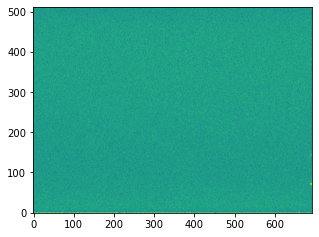

looks ok? (y/n/next to go to the next pup/x to clip the wav)y
saving clip...
getting starts and stops from...
	 BK_24224x25894_ltr3_pup1_ch2_4400_m_338_313_fr0_p9_2021-12-16_10-42-08
there are 542 clips to peruse...
	getting raw audio..
	getting clips from the audio...
33.622012 : 36.544512 s


/n/hoekstra_lab_tier1/Users/njourjine/public_repositories/peromyscus-pup-vocal-evolution/src/annotation.py:91: RuntimeWarning: divide by zero encountered in log
  spec = np.log(np.abs(spec))


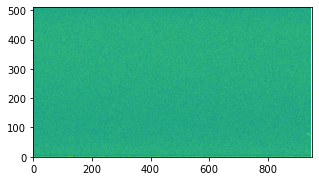

looks ok? (y/n/next to go to the next pup/x to clip the wav)y
saving clip...
getting starts and stops from...
	 BK_24224x25894_ltr3_pup2_ch3_5200_f_335_326_fr0_p9_2021-12-16_10-42-08
there are 192 clips to peruse...
	getting raw audio..
	getting clips from the audio...
24.260608 : 26.742784 s


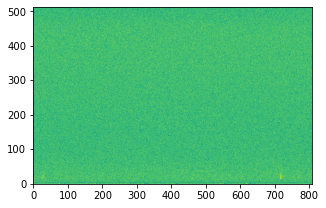

looks ok? (y/n/next to go to the next pup/x to clip the wav)y
saving clip...
getting starts and stops from...
	 BK_24224x25894_ltr4_pup1_ch2_1900_m_337_269_fr0_p1_2022-01-16_10-39-22
there are 110 clips to peruse...
	getting raw audio..
	getting clips from the audio...
0.692224 : 3.667968 s


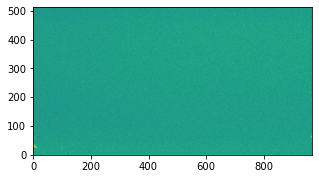

looks ok? (y/n/next to go to the next pup/x to clip the wav)x
how many seconds into this clip do you want it to start?.1
how many seconds before the end of this clip do you want it to end?1


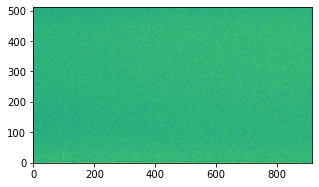

saving this clip...
getting starts and stops from...
	 BK_24224x25894_ltr4_pup2_ch3_1900_m_336_263_fr0_p1_2022-01-16_10-39-22
there are 567 clips to peruse...
	getting raw audio..
	getting clips from the audio...
51.329024 : 54.122496 s


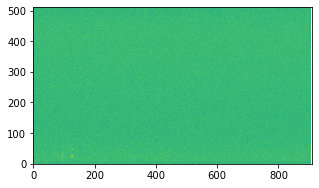

In [ ]:
#best to run this cell one species at a time and save clips to species specific directories
species = 'BK'

#path to directory containing raw audio
audio_dir = all_wav_raw

#path to directory containing segments generated in section 2.2 above
dataset = 'development'
iteration='20230118_083823' 
seg_df = os.path.join(segments_root,dataset,'amplitude_segmented',iteration, 'all_combined.csv')
save_dir = os.path.join(noise_root, 'test_20230120', species)
if not os.path.exists(save_dir):
    os.mkdir(save_dir)
    print('made the directory', save_dir)

pups = sorted([i.split('.')[0] for i in os.listdir(all_wav_raw) if species in i])

for pup in pups:
    annotation.get_noise_clip(pup=pup, 
                              audio_dir=audio_dir, 
                              seg_csv=seg_df, 
                              save_dir=save_dir, 
                              margin=0, 
                              min_dur=2, 
                              max_dur=3, 
                              units = 's')

## calculate noise floors

# get SNR and clipping

## set spectrogramming parameters

In [10]:
# #choose params that match the ones you will use for getting features
# noise_spec_params = {
#     'min_freq': 5000, # minimum frequency
#     'max_freq': 12500, # maximum frequency
#     'nperseg': 1024, # FFT
#     'noverlap': 1024 // 4, # FFT
#     'fs': 250000, # audio samplerate
# }

# spec_params = {
#     'min_freq': 5000, # minimum frequency
#     'max_freq': 124999, # maximum frequency
#     'nperseg': 256, # FFT
#     'noverlap': 256 // 4, # FFT
#     'spec_min_val': 0.7, # minimum log-spectrogram value
#     'fs': 250000, # audio samplerate
#     'downsample_by':2, #2 means take every other pixel from the original spectrogram
#     'log_resize_scaling_factor':None
# }

# #set directories TO DO: put these in a .py file and run at the top
# noise_dir = '/Volumes/LaCie/07_manuscript/audio/BW_noise_samples/'
# wav_dir = '/Volumes/LaCie/07_manuscript/audio/clips/development_params_mod1/'

## get noise floors

In [3]:
# noise_floors_path = '/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/noise/all_noise_floors.csv'
# nfdf = pd.read_csv(noise_floors_path)

## get clipping

In [17]:
# #consider a sample clipped it it exceeds 0.95*32767, where 32767 is the max possible value of a 16-bit recording
# clipping_threshold = 0.95
# to_process_dir = all_voc_clips_dirs
# dataset = 'development'

# clipping_dfs = []
# species_list = sorted(os.listdir(to_process_dir))

# if dataset == 'development':
#     assert sorted(species_list) == sorted(['BW', 'BK', 'NB', 'SW', 'PO', 'LO', 'GO', 'LL', 'MU', 'MZ', 'IS'])
    
# #get clipping percents and corresping source_file names
# for species in species_list:
#     print('calculating clipping for each vocalization clip in:\n\t', os.path.join(all_voc_clips_dirs, species))
#     clipping_df = get_clipping_batch(wav_dir = os.path.join(all_voc_clips_dirs, species),
#                                      threshold = clipping_threshold, 
#                                      species = species)

# print('combinging clipping dfs...')
# all_clipping = pd.concat(clipping_dfs)
# print('done.')
    

calculating clipping for each vocalization clip in:
	 /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/clips/amplitude_segmented/final/vocalization_clips/BK


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 42244/42244 [00:40<00:00, 1045.60it/s]


calculating clipping for each vocalization clip in:
	 /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/clips/amplitude_segmented/final/vocalization_clips/BW


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30131/30131 [01:17<00:00, 390.29it/s]


calculating clipping for each vocalization clip in:
	 /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/clips/amplitude_segmented/final/vocalization_clips/GO


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66868/66868 [04:03<00:00, 274.44it/s]


calculating clipping for each vocalization clip in:
	 /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/clips/amplitude_segmented/final/vocalization_clips/IS


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3755/3755 [00:06<00:00, 546.32it/s]


calculating clipping for each vocalization clip in:
	 /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/clips/amplitude_segmented/final/vocalization_clips/LL


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18371/18371 [00:36<00:00, 502.95it/s]


calculating clipping for each vocalization clip in:
	 /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/clips/amplitude_segmented/final/vocalization_clips/LO


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19429/19429 [00:38<00:00, 506.92it/s]


calculating clipping for each vocalization clip in:
	 /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/clips/amplitude_segmented/final/vocalization_clips/MU


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 26628/26628 [00:50<00:00, 529.30it/s]


calculating clipping for each vocalization clip in:
	 /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/clips/amplitude_segmented/final/vocalization_clips/MZ


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12045/12045 [00:21<00:00, 564.47it/s]


calculating clipping for each vocalization clip in:
	 /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/clips/amplitude_segmented/final/vocalization_clips/NB


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 34079/34079 [01:11<00:00, 477.57it/s]


calculating clipping for each vocalization clip in:
	 /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/clips/amplitude_segmented/final/vocalization_clips/PO


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10468/10468 [00:20<00:00, 501.27it/s]


calculating clipping for each vocalization clip in:
	 /n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/clips/amplitude_segmented/final/vocalization_clips/SW


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 27289/27289 [00:55<00:00, 493.71it/s]


combinging clipping dfs...


ValueError: No objects to concatenate

## get signal to noise

In [15]:
# snr_df = get_snr_batch(clip_dir = wav_dir, 
#                        noise_dir = noise_dir, 
#                        algorithm=2,
#                        species = 'BW')

# #save because this takes a long time
# snr_df.to_csv('/Users/nick_jourjine/Desktop/snr.csv', index=False)

100%|██████████| 40015/40015 [03:56<00:00, 168.91it/s]


## collate clipping, signal to noise, and warbleR features

In [3]:
# #get the signal to noise and clipping
# qc_df = snr_df.merge(clipping_df, on=['source_file'])

# #get the features calculated with the R script warbleR_extract.R
# ftrs = pd.read_csv('/Volumes/LaCie/07_manuscript/audio/metadata/features/BW_seg06-13-22.csv')

# #merge and save
# all_features = ftrs.merge(qc_df, on = ['source_file'])
# all_features.to_csv('/Users/nick_jourjine/Desktop/all_features.csv')

# UMAP embedding

## set species and paths

In [31]:
# TO DO clean up comments

#set the species to process
species_list = ['PO','BW', 'BK', 'NB', 'SW', 'LO', 'GO', 'LL', 'MU', 'MZ']

#the dataset for umap
dataset = 'development'
segment_iteration = 'final_20220817' #this is the segmenting iteration for the segments in the preprint

#unique iteration ID for each time you do an embedding for a dataset
umap_iteration = parameters.get_date_time()

#all predicted start and stop times for this dataset
aggregated_segments_path = os.path.join(segments_root,dataset,'amplitude_segmented',segment_iteration,'all_combined.csv')
seg_df = pd.read_csv(aggregated_segments_path)

#path to wav files for each segmented vocalization
all_wav_dir = os.path.join(clips_root,dataset,'amplitude_segmented',segment_iteration)
assert os.path.exists(all_wav_dir)

#path to directory where spectrograms and umap embedding coordinates will be save
all_spec_dir = os.path.join(specs_root,'amplitude_segmented',dataset, segment_iteration)
assert os.path.exists(all_spec_dir)

#path to the noise floors csvs generated by annotation.get_noise_clip() and annotation.get_noise_floor()
noise_floors_path = '/n/hoekstra_lab_tier1/Users/njourjine/manuscript/audio/noise/all_noise_floors.csv
assert os.path.exists(noise_floors_path)


## choose and save spectrogram parameters

In [ ]:
#write the spec params

#make necessary directories for spectrograms
specs_dir = os.path.join(all_spec_dir,umap_iteration)+'/'
if umap_iteration not in os.listdir(all_spec_dir):
    os.mkdir(specs_dir)
    print('made a root directory to store umap embeddings from this version_name:\t\n', specs_dir, '\n')

if '00_params' not in os.listdir(specs_dir):
    os.mkdir(os.path.join(specs_dir,'00_params'))
    print('made a params directory to store umap embeddings from this version_name:\t\n', specs_dir+'00_params\n')

#write the params dictionaries for each species
for species in species_list:
    species_param_name = ('_').join([species,'spec_params',umap_iteration])
    species_wav_clips_dir = os.path.join(clips_root, dataset, segmenting_iteration, 'vocalization_clips', species)
    max_dur = float(np.max(seg_df['duration'].loc[seg_df['species'] == species]))
    print('longest predicted voc from', species, 'is', max_dur, 'seconds')

    spec_params = {
        'species': species,
        'min_freq': 20000, # minimum frequency
        'max_freq': 125000, # maximum frequency
        'nperseg': 1024, # FFT
        'noverlap': 1024 // 4, # FFT
        'spec_min_val': .5, # minimum log-spectrogram value - update from noise floors dataframe if noise_floors_path provided
        'fs': 250000, # audio samplerate
        'fill_value': .5,
        'max_duration':max_dur,
        'num_time_bins':128,
        'num_freq_bins':128,
        'spec_max_val':10,
        'wav_clips_source':species_wav_clips_dir,
        'noise_floors_path': noise_floors_path
    }

    #save spec params if they don't exist
    parameters.save_parameters(spec_params, os.path.join(specs_dir,'00_params'), species_param_name)


## find UMAP embeddings for each species

In [ ]:
#set the directory for saving and make it TODO - get the data from datetime

for species in species_list:
    print('##########################################################################')
    species_wav_clips_dir = os.path.join(clips_root, dataset, 'vocalization_clips', species)
    species_param_name = ('_').join([species,'spec_params',umap_iteration])
    print(species)
    print('##########################################################################')
    print('getting umap embedding from wav clips here.......\n\n',species_wav_clips_dir ,'\n')
    print('using these parameters..............\n\n', os.path.join(specs_dir+'00_params/', species_param_name), '\n')
    print('and saving umap coordinates here.......\n\n',specs_dir,'\n')
    print(len(source_data.loc[source_data['species'] == species]), 'vocalization clips will be written to wav files')
    
val = input('continue?' 'y/n')

assert val in ['y', 'n']

if val == 'n':
    print('ok - doing nothing.')

elif val == 'y':
    
    for species in species_list:
        params_dir = os.path.join(specs_dir+'00_params/')
        params_name = ('_').join([species,'spec_params',umap_iteration])
        
        #load the spec params
        print('loading parameters...')
        spec_params = load_parameters(params_dir, params_name)
        print('done.')
        
        #get the clips for the embedding (excluding noise)
        print('getting paths to wav clips...')
        clips_to_process = [i for i in glob.glob(spec_params['wav_clips_source']+'*.wav')]
        print('done.')

        #make the umap
        print('getting umap embeddings...')
        wavs_to_umap(clips_dir=None, 
                     noise_floors_path = spec_params['noise_floors_path'],
                     species = None, 
                     noise_floor = spec_params['spec_min_val'], 
                     spec_params = spec_params, 
                     num_to_process = 'all', 
                     filtered_clips = clips_to_process, 
                     version=umap_iteration, 
                     save_root = specs_dir)